<a href="https://colab.research.google.com/github/hanyoseob/lecture_optimization/blob/main/chapter06_Newton's_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Newton's Method](https://en.wikipedia.org/wiki/Newton%27s_method)
---
In numerical analysis, ___Newton's method___, also known as the ___Newton–Raphson method___, named after Isaac Newton and Joseph Raphson, is __a root-finding algorithm__ which produces successively better approximations to the roots (or zeroes) of a real-valued function. The most basic version starts with a single-variable function $f$ defined for a real variable $x$, the function's derivative $f'$, and an initial guess $x_0$ for a root of $f$.

>![newton's method](https://upload.wikimedia.org/wikipedia/commons/d/da/Newton_optimization_vs_grad_descent.svg "")
>__[FIGURE] A comparison of [gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent) (green) and [Newton's method]((https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)) (red) for minimizing a function (with small step sizes). Newton's method uses curvature information (i.e. the second derivative) to take a more direct route.__

__Before following an implementation below, PLEASE REVIEW MATHMETICAL DSCRIPTION[$^{[1]}$](https://en.wikipedia.org/wiki/Newton%27s_method)$^,$ [$^{[2]}$](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) since the more details are described HERE[$^{[1]}$](https://en.wikipedia.org/wiki/Newton%27s_method)$^,$ [$^{[2]}$](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization).__


## General solution
---
> $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$,

where $f(\cdot)$ and $f'(\cdot)$ are the function trying to find the roots ( or zeros ) and its derivative, respectively.


# Implementation
---

1. Problem definition
2. Implement the gradient descent method

## Example 1: $x^2 = a$

### Step 1. Problem definition

1. The problem of finding the square root of numbe $a = 612$
> $x^2 = a$
>
> $x^2 = 612$

2. The function trying to find the roots $f(x)$
> $f(x) = x^2 - 612$

3. its derivative $f'(x)$
> $f'(x) = 2x$

4. Global solution
> $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$
>
> $x_{n+1} = x_n - \frac{x_n^2 - 612}{2x_n}$

### Step 2. Newton's method

1. Add packages
2. Set the parameters of the newton's method
3. Find the solution

#### Add packages

In [1]:
# Mathmetical packages
import numpy as np

# Ploting packages
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

# Ploting options
font = {'family': 'normal',
        'weight': 'bold',
        'size': 10}

matplotlib.rc('font', **font)


#### Set the parameters of the gradient descent method

In [2]:
# a: x^2
a = 612
# a = 10 * np.random.rand()

# Exact solution
x_gt = np.sqrt(a)

# F: The function trying to find the roots ( or zeros )
# dF: Its derivative
F = lambda x: x**2 - a
dF = lambda x: 2*x

# Plot the function space
x_smp = 1000
x_rng = [(1.0 - 0.5) * x_gt, (1.0 + 0.5) * x_gt]
x_set_ex1 = np.linspace(x_rng[0], x_rng[-1], x_smp)
y_set_ex1 = F(x_set_ex1)

# Hyper parameters for the Newton's method
max_iter = 10

# intial point of x
x0 = 10
# x0 = 10 * np.random.rand()

#### Find the solution

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


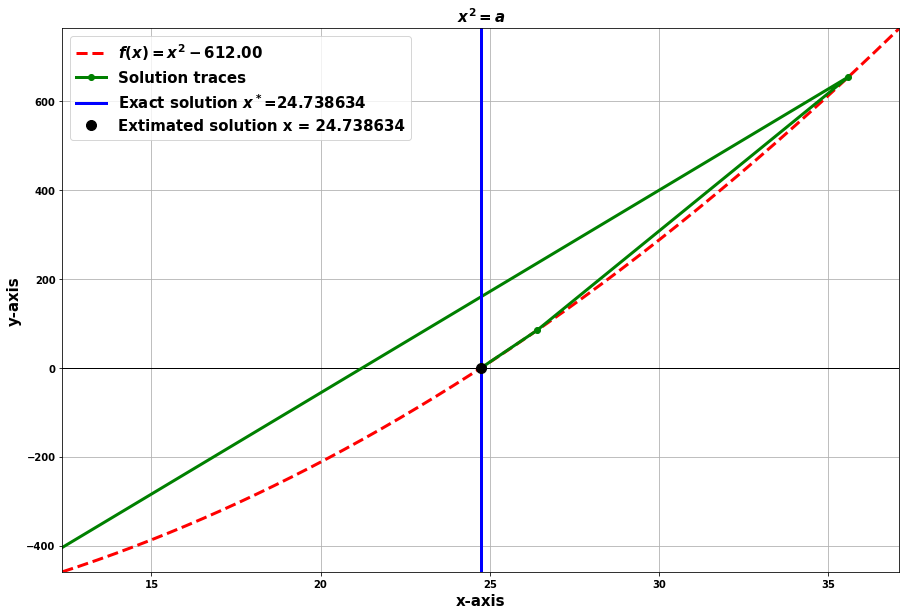

 
The sequence given by Newton's method is:
# of iter 	x^2 = 612.00
--------------------------------
x_000 		+10.000000000000
x_001 		+35.600000000000
x_002 		+26.395505617978
x_003 		+24.790635492455
x_004 		+24.738688294075
x_005 		+24.738633753766
x_006 		+24.738633753706
x_007 		+24.738633753706
x_008 		+24.738633753706
x_009 		+24.738633753706
x_010 		+24.738633753706
--------------------------------
x* 		+24.738633753706


In [3]:
x = x0

x_iter = []
y_iter = []

x_iter.append(x)
y_iter.append(F(x))

# Search the solution using the Newton's method
for i in range(1, max_iter + 1):

  # Newton's method
  x = x - F(x) / dF(x)

  x_iter.append(x)
  y_iter.append(F(x))

x_iter_ex1 = x_iter
y_iter_ex1 = y_iter

# Plot the solution traces
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

axs.plot(x_set_ex1, np.zeros_like(y_set_ex1), 'k-', linewidth=1)
axs.plot(x_set_ex1, y_set_ex1, 'r--', label='$f(x) = x^2 - %.2f$' % a, linewidth=3)
axs.plot(x_iter_ex1, y_iter_ex1, 'go-', label='Solution traces', linewidth=3)
axs.plot(x_gt * np.ones_like(y_set_ex1), y_set_ex1, 'b-', label='Exact solution $x^*$=%.6f' % x_gt, linewidth=3)
axs.plot(x_iter_ex1[-1], y_iter_ex1[-1], 'ko', label='Extimated solution x = %.6f' % x_iter_ex1[-1], markersize=10)
axs.legend(fontsize=15)
axs.grid(True)
axs.set_xlim((x_set_ex1[0], x_set_ex1[-1]))
axs.set_ylim((y_set_ex1[0], y_set_ex1[-1]))
axs.set_xlabel('x-axis', fontsize=15, fontweight='bold')
axs.set_ylabel('y-axis', fontsize=15, fontweight='bold')
axs.set_title('$x^2 = a$', fontsize=15, fontweight='bold')

plt.show()

# Print the solution traces
print(' ')
print('The sequence given by Newton\'s method is:')
print('# of iter \tx^2 = %.2f' % (a))
print('--------------------------------')
for (i, x) in enumerate(x_iter_ex1):
  print('x_%03d \t\t%+.12f' % (i, x))

print('--------------------------------')
print('x* \t\t%+.12f' % (x_iter_ex1[-1]))

## Example 2: $cos(x) = x^3$

### Step 1. Problem definition

1. The problem of finding the square root of numbe $a = 612$
> $cos(x) = x^3$

2. The function trying to find the roots $f(x)$
> $f(x) = cos(x) - x^3$

3. its derivative $f'(x)$
> $f'(x) = -sin(x) - 3x^2$

4. Global solution
> $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$
>
> $x_{n+1} = x_n - \frac{cos(x_n) - x_n^3}{-sin(x_n) - 3x_n^2}$

### Step 2. Newton's method

1. Add packages
2. Set the parameters of the newton's method
3. Find the solution

#### Add packages

In [4]:
# Mathmetical packages
import numpy as np

# Ploting packages
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

# Ploting options
font = {'family': 'normal',
        'weight': 'bold',
        'size': 10}

matplotlib.rc('font', **font)


#### Set the parameters of the gradient descent method

In [5]:
# F: The function trying to find the roots ( or zeros )
# dF: Its derivative
F = lambda x: np.cos(x) - x**3
dF = lambda x: -np.sin(x) - 3*x**2

# Plot the objective function space
x_smp = 1000
x_rng = [0, 1.5]
x_set_ex2 = np.linspace(x_rng[0], x_rng[1], x_smp)
y_set_ex2 = F(x_set_ex2)

# Hyper parameters for the Newton's method
max_iter = 10

# intial point of x
x0 = 0.5

#### Find the solution

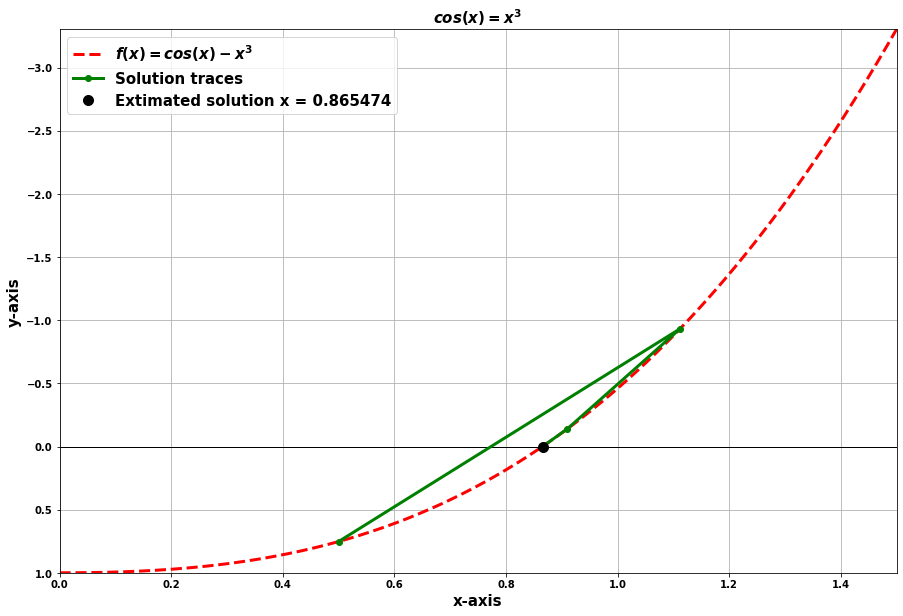

 
The sequence given by Newton's method is:
# of iter 	cos(x) = x^3
--------------------------------
x_00 		+0.500000000000
x_01 		+1.112141637097
x_02 		+0.909672693737
x_03 		+0.867263818209
x_04 		+0.865477135298
x_05 		+0.865474033111
x_06 		+0.865474033102
x_07 		+0.865474033102
x_08 		+0.865474033102
x_09 		+0.865474033102
x_10 		+0.865474033102
--------------------------------
x* 		+24.738633753706


In [6]:
x = x0

x_iter = []
y_iter = []

x_iter.append(x)
y_iter.append(F(x))

# Search the solution using the Newton's method
for i in range(1, max_iter + 1):

  # Newton's method
  x = x - F(x) / dF(x)

  x_iter.append(x)
  y_iter.append(F(x))

x_iter_ex2 = x_iter
y_iter_ex2 = y_iter

# Plot the solution traces
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

axs.plot(x_set_ex2, np.zeros_like(y_set_ex2), 'k-', linewidth=1)
axs.plot(x_set_ex2, y_set_ex2, 'r--', label='$f(x) = cos(x) - x^3$', linewidth=3)
axs.plot(x_iter_ex2, y_iter_ex2, 'go-', label='Solution traces', linewidth=3)
axs.plot(x_iter_ex2[-1], y_iter_ex2[-1], 'ko', label='Extimated solution x = %.6f' % x_iter_ex2[-1], markersize=10)
axs.legend(fontsize=15)
axs.grid(True)
axs.set_xlim((x_set_ex2[0], x_set_ex2[-1]))
axs.set_ylim((y_set_ex2[0], y_set_ex2[-1]))
axs.set_xlabel('x-axis', fontsize=15, fontweight='bold')
axs.set_ylabel('y-axis', fontsize=15, fontweight='bold')
axs.set_title('$cos(x) = x^3$', fontsize=15, fontweight='bold')

plt.show()

# Print the solution traces
print(' ')
print('The sequence given by Newton\'s method is:')
print('# of iter \tcos(x) = x^3')
print('--------------------------------')
for (i, x) in enumerate(x_iter_ex2):
  print('x_%02d \t\t%+.12f' % (i, x))
 
print('--------------------------------')
print('x* \t\t%+.12f' % (x_iter_ex1[-1]))

# Conclusion

Below figure shows the solution traces for two examples above.

[Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) uses curvature information (i.e. the second derivative) to take a more direct route, so the trajectory is shorter than the [gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent).



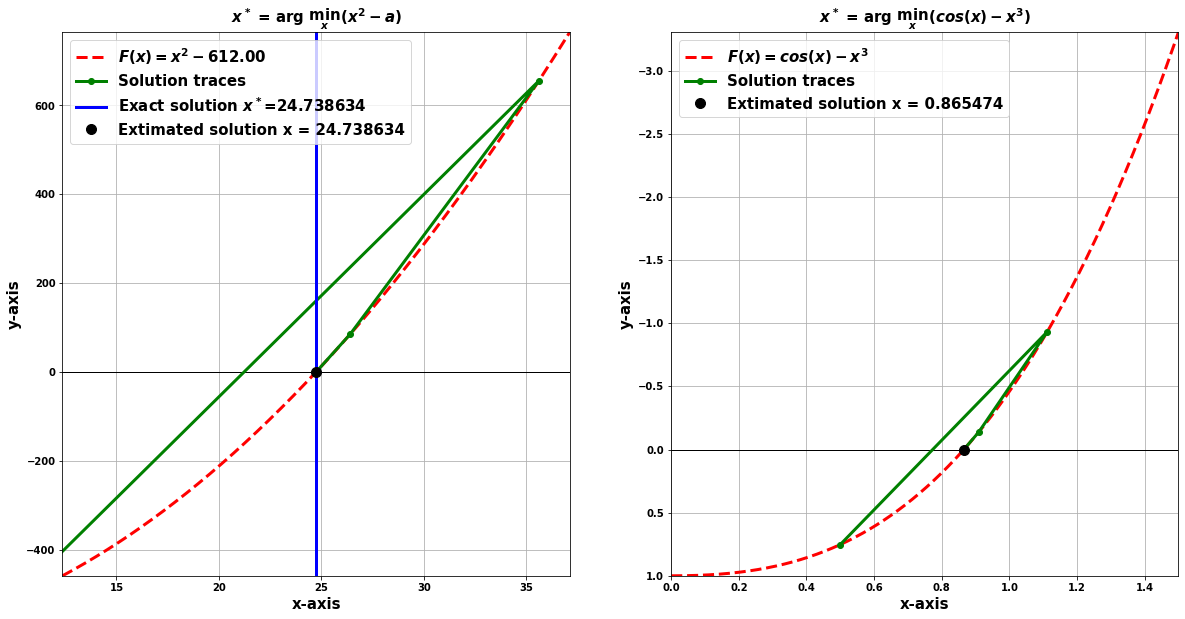

 
The sequence given by Newton's method is:
# of iter 	x^2 = 612.00 		cos(x) = x^3
-------------------------------------------------------
x_000 		+10.000000000000	+0.500000000000
x_001 		+35.600000000000	+1.112141637097
x_002 		+26.395505617978	+0.909672693737
x_003 		+24.790635492455	+0.867263818209
x_004 		+24.738688294075	+0.865477135298
x_005 		+24.738633753766	+0.865474033111
x_006 		+24.738633753706	+0.865474033102
x_007 		+24.738633753706	+0.865474033102
x_008 		+24.738633753706	+0.865474033102
x_009 		+24.738633753706	+0.865474033102
x_010 		+24.738633753706	+0.865474033102
-------------------------------------------------------
x* 		+24.738633753706	+0.865474033102


In [7]:
# Plot the solution traces with large step size
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

# Example 1: x^2 = a
ax = axs[0]
ax.plot(x_set_ex1, np.zeros_like(y_set_ex1), 'k-', linewidth=1)
ax.plot(x_set_ex1, y_set_ex1, 'r--', label='$F(x) = x^2 - %.2f$' % a, linewidth=3)
ax.plot(x_iter_ex1, y_iter_ex1, 'go-', label='Solution traces', linewidth=3)
ax.plot(x_gt * np.ones_like(y_set_ex1), y_set_ex1, 'b-', label='Exact solution $x^*$=%.6f' % x_gt, linewidth=3)
ax.plot(x_iter_ex1[-1], y_iter_ex1[-1], 'ko', label='Extimated solution x = %.6f' % x_iter_ex1[-1], markersize=10)
ax.legend(fontsize=15)
ax.grid(True)
ax.set_xlim((x_set_ex1[0], x_set_ex1[-1]))
ax.set_ylim((y_set_ex1[0], y_set_ex1[-1]))
ax.set_xlabel('x-axis', fontsize=15, fontweight='bold')
ax.set_ylabel('y-axis', fontsize=15, fontweight='bold')
ax.set_title('$x^*$ = arg $\min_x (x^2 - a)$', fontsize=15, fontweight='bold')

# Example 2: cos(x) = x^3
ax = axs[1]
ax.plot(x_set_ex2, np.zeros_like(y_set_ex2), 'k-', linewidth=1)
ax.plot(x_set_ex2, y_set_ex2, 'r--', label='$F(x) = cos(x) - x^3$', linewidth=3)
ax.plot(x_iter_ex2, y_iter_ex2, 'go-', label='Solution traces', linewidth=3)
ax.plot(x_iter_ex2[-1], y_iter_ex2[-1], 'ko', label='Extimated solution x = %.6f' % x_iter_ex2[-1], markersize=10)
ax.legend(fontsize=15)
ax.grid(True)
ax.set_xlim((x_set_ex2[0], x_set_ex2[-1]))
ax.set_ylim((y_set_ex2[0], y_set_ex2[-1]))
ax.set_xlabel('x-axis', fontsize=15, fontweight='bold')
ax.set_ylabel('y-axis', fontsize=15, fontweight='bold')
ax.set_title('$x^*$ = arg $\min_x (cos(x) - x^3)$', fontsize=15, fontweight='bold')

plt.show()

# Print the solution traces
print(' ')
print('The sequence given by Newton\'s method is:')
print('# of iter \tx^2 = %.2f \t\tcos(x) = x^3' % (a))
print('-------------------------------------------------------')
for i in range(max_iter + 1):
  x_ex1 = x_iter_ex1[i]
  x_ex2 = x_iter_ex2[i]
  if i % 1 == 0:
    print('x_%03d \t\t%+.12f\t%+.12f' % (i, x_ex1, x_ex2))

print('-------------------------------------------------------')
print('x* \t\t%+.12f\t%+.12f' % (x_iter_ex1[-1], x_iter_ex2[-1]))

#References
---

1. [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)
2. [Newton's method in optimization](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)


# Next
---

[Next chapter](https://colab.research.google.com/drive/1tlOUw92mmyWnUW2f72DfeR0EK8RhkKtT?usp=sharing), we will implement the [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) to solve a 2D optimization problems.